##**機械学習　効果測定（分類）**




#環境構築

In [2]:
#Google　Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
mkdir data

In [5]:
 cd data

[Errno 2] No such file or directory: 'data'
/content/data



##※ matplotlib日本語化のためのライブラリのインストール
▶ 以下を実行してください。

In [6]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=b6992ef3dc867a0cd44c8b148b577d3a388b1629bf97e756275e41002b90a064
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

###各種ライブラリのインポートをする

In [7]:
#各種ライブラリのインポートをする
import pandas as pd
%matplotlib inline
import japanize_matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##1. CSVファイルの読み込みと表示

In [8]:
#csvの読み込み。第２引数に文字コードを指定できる
df = pd.read_csv('digits.csv',encoding = "sjis")

In [9]:
#読み込まれているか確認
df.head(5)

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,5,13,9,1,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,1,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,2,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,3,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
4,4,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [10]:
from sklearn import datasets
from matplotlib import pyplot as plt
# from sklearn import datasets

digits = datasets.load_digits()

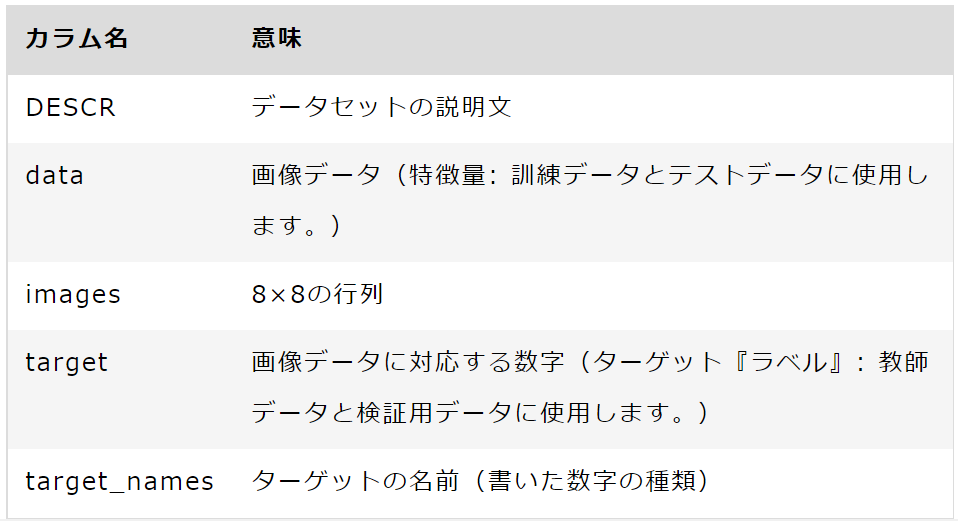

In [11]:
print(digits.data)         # digitデータセットのdataの値を出力
print(digits.data.shape)   # digitデータセットのdataの構造を出力 1797×64の2次元配列 (1797, 64)
print(digits.target.shape) # digitデータセットのtargetの構造を出力　要素が1797個の1次元配列

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
(1797,)


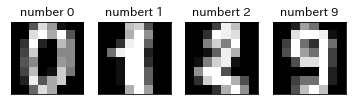

In [12]:
#インターネットから引用。
#今回はカテゴリ特徴量なし
#  画像の表示
# number 0
#imshow() は数値を画像で表示できるようにした関数
plt.subplot(141), plt.imshow(digits.images[0], cmap = 'gray')
plt.title('number 0'), plt.xticks([]), plt.yticks([])

# number 1
plt.subplot(142), plt.imshow(digits.images[1], cmap = 'gray')
plt.title('numbert 1'), plt.xticks([]), plt.yticks([])

# number 2
plt.subplot(143), plt.imshow(digits.images[2], cmap = 'gray')
plt.title('numbert 2'), plt.xticks([]), plt.yticks([])

# number 9
plt.subplot(144), plt.imshow(digits.images[-2], cmap = 'gray')
plt.title('numbert 9'), plt.xticks([]), plt.yticks([])

plt.show()

##2. カテゴリ特徴量があるときはダミー変数化

→カテゴリ特徴量なし

##3. テストデータの分離 

In [13]:
#テストデータの分離
#訓練データとテストデータの比率は８：２、
#分割する内容が異ならないように乱数シードは０
train_val, test = train_test_split(df,test_size = 0.2,
random_state = 0)

##4.前処理 

In [14]:
#手書き文字の画像の「種類:数」
df['target'].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

4-1.欠損値処理の過程

In [15]:
#欠損値の確認

#列ごとに欠損値が含まれているか調べる
#df.isnull().any(axis = 0)

#全体に欠損値が含まれているか調べる
df.isnull().values.sum()!=0

#欠損値なし

False

##4-2.各項目の実施

4-2-1.外れ値の処理

→使用モデルは「決定木」なので外れ値の処理なし

4-2-2.特徴量の絞り込み

→特になし

4-2-3.標準化の実装

→特になし

4-2-4.多項式特徴量、交互作用特徴量を追加

→特になし

4-2-5.特徴量と正解データの分割

In [21]:
x = df.loc[:,"pixel_0_0":"pixel_7_7"]
t = df["target"]

x_train, x_test, y_train, y_test=train_test_split(x, t,
                                                  test_size = 0.2, random_state = 0)

x_train, x_val, y_train, y_val=train_test_split(x, t,
 test_size = 0.2, random_state = 0)

##5.学習モデルの選択

チートシートにて学習モデルの選択を行う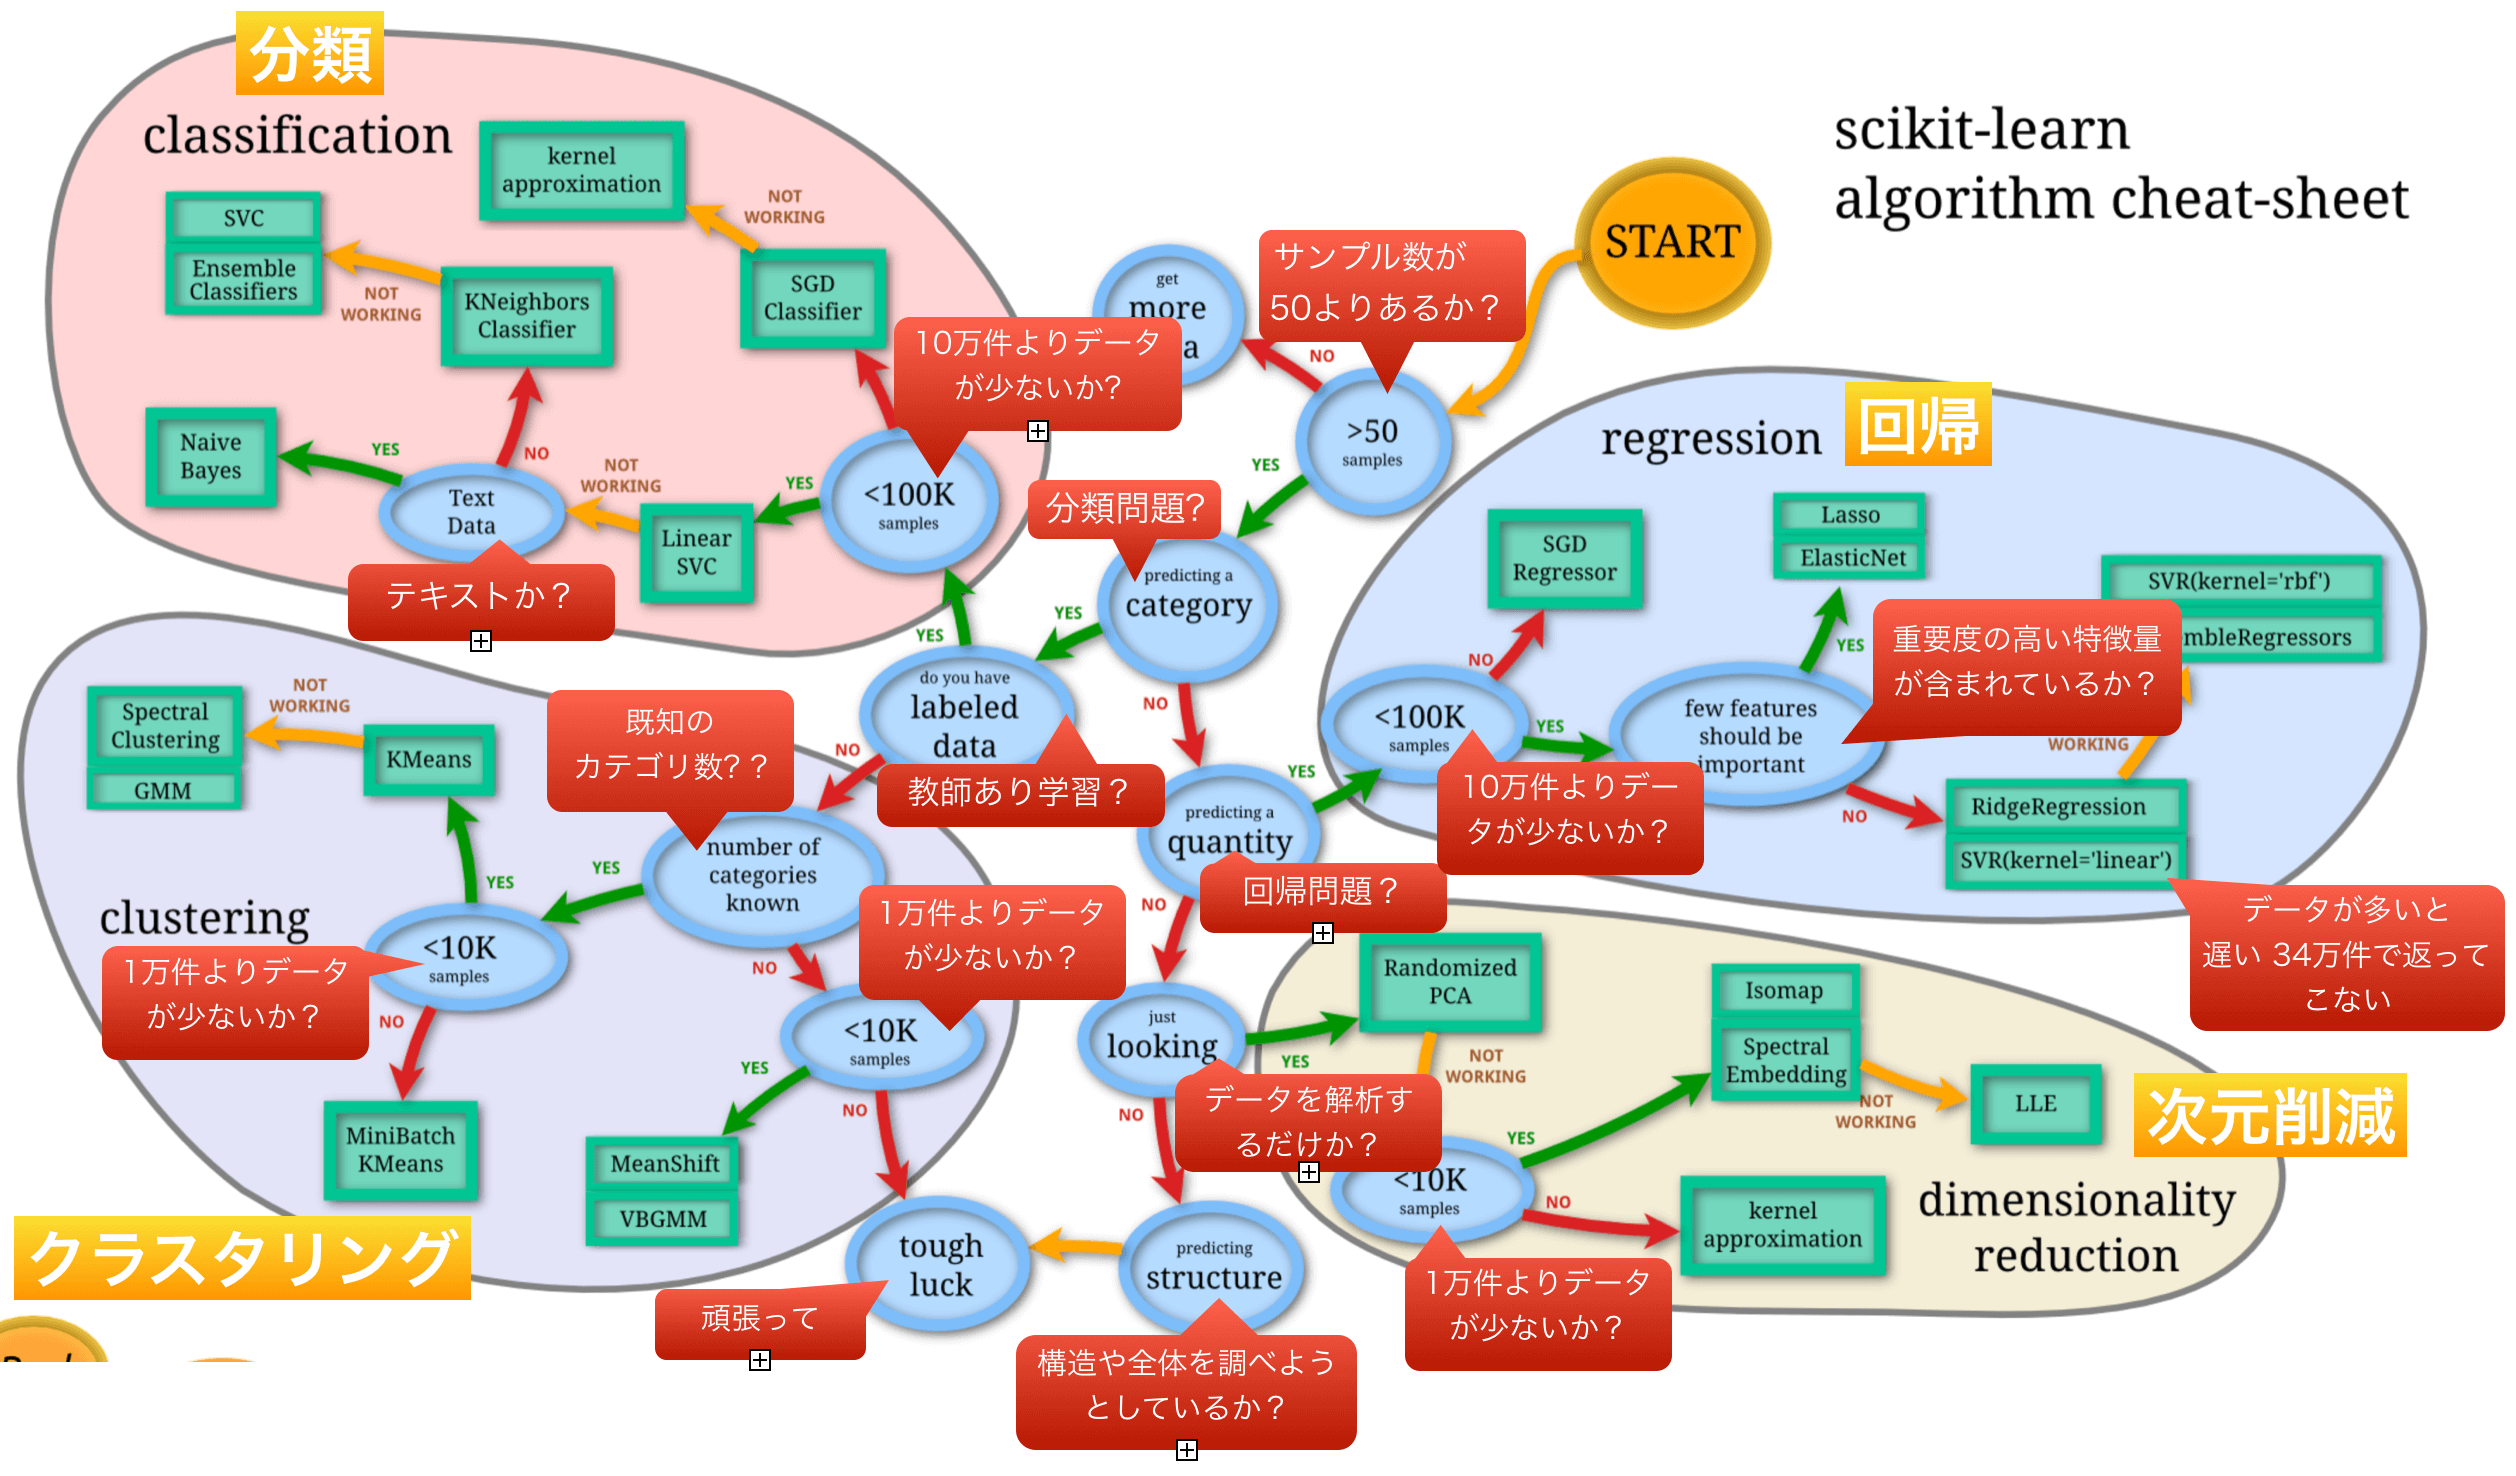

STRT→サンプル数が５０以上→分類→教師あり学習→１０万件より多い
**「SGDclassifier」**を選択としたかったが基礎を抑えるために**「ランダムフォレスト」**
を使用（いつか挑戦してみたい）

In [22]:
from sklearn.ensemble import RandomForestClassifier

##6.選択された学習モデルで学習

In [23]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
#ランダムフォレストにて学習
model = RandomForestClassifier(n_estimators = 200,
random_state = 0)

model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
0.9722222222222222


In [25]:
#単純な決定木と分類する
from sklearn import tree
model2 = tree.DecisionTreeClassifier(random_state = 0)
model2.fit(x_train, y_train)

print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

1.0
0.8472222222222222


In [26]:
importance = model.feature_importances_ # 特徴量重要度

# 列との対応がわかりやすいようにシリーズ変換
pd.Series(importance, index = x_train.columns)

pixel_0_0    0.000000
pixel_0_1    0.002549
pixel_0_2    0.021298
pixel_0_3    0.010329
pixel_0_4    0.008604
               ...   
pixel_7_3    0.010551
pixel_7_4    0.026429
pixel_7_5    0.028806
pixel_7_6    0.013407
pixel_7_7    0.002132
Length: 64, dtype: float64

##7.正解率または決定係数の表示

In [27]:
#検証データで評価
model.score(x_val,y_val)

0.9722222222222222

In [28]:
import cv2

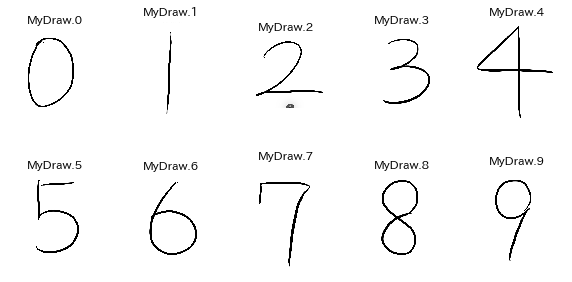

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 自作数字の読み込み
pil_images = []
for i in range(10):
    # mytest_数値.pngでローカルに保存したファイル
    pil_image = Image.open('mytest_' + str(i) + '.png').convert('L') # 8bit(256階調) gray
    pil_images.append(pil_image)

# 画像出力（オリジナル）
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    ax.set_title('MyDraw.{}'.format(i))
    ax.imshow(pil_images[i],cmap=plt.cm.gray, interpolation='none')
plt.show()

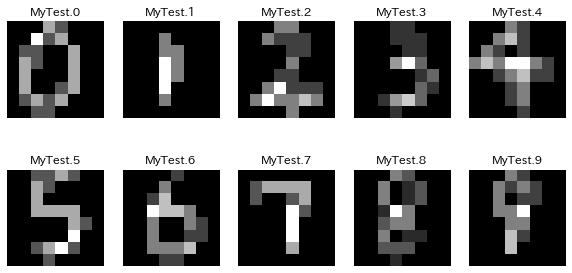

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 自作数字の読み込み
pil_images = []
for i in range(10):
    # mytest_数値.pngでローカルに保存したファイル
    pil_image = Image.open('mytest_' + str(i) + '.png').convert('L') # 8bit(256階調) gray
    pil_image_resize = pil_image.resize((8, 8), Image.LANCZOS)
    pil_images.append(pil_image)

# pil画像データ変換(サイズ、階調をトレーニングデータ形式あわせる）
test_data = np.empty((10, 8, 8), dtype=float)
for i in range(10):
    pil_image_resize = pil_images[i].resize((8, 8), Image.LANCZOS) # 8×8にリサイズ
    test_data[i] = np.array(pil_image_resize, dtype=float) # ndarray型に変換
    test_data[i] = 16 - np.floor(17 * test_data[i] / 256) # 0-255 -> 0-16＆明暗反転

# 画像出力（digits形式に変換後）
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.axis('off')
    ax.set_title('MyTest.{}'.format(i))
    ax.imshow(test_data[i],cmap=plt.cm.gray, interpolation='none')
plt.show()

In [35]:
import numpy as np
from sklearn import datasets, svm, metrics
from PIL import Image

#　■トレーニングデータの準備■
digits = datasets.load_digits() #ldigitsデータ読み込み (1797, 8, 8)
# リサイズデータ(1797, 8, 8) -> (1797, 64) digits.dataでも同じ
data_train = digits.images.reshape((digits.images.shape[0],-1)) 
label_train = digits.target # 正解ラベル(1797,)

# ■自作数値データの準備■
# pilで画像読み込み
pil_images = []
for i in range(10):
    # mytest_数値.pngでローカルに保存したファイル
    pil_image = Image.open('mytest_' + str(i) + '.png').convert('L') # 8bit(256階調) gray
    pil_image_resize = pil_image.resize((8, 8), Image.LANCZOS)
    pil_images.append(pil_image)
# pil画像のデータ変換
test_data = np.empty((10, 8, 8), dtype=float)
for i in range(10):
    pil_image_resize = pil_images[i].resize((8, 8), Image.LANCZOS) # 8×8にリサイズ
    test_data[i] = np.array(pil_image_resize, dtype=float) # ndarray型に変換
    test_data[i] = 16 - np.floor(17 * test_data[i] / 256) # 0-255 -> 0-16＆明暗反転
test_data = test_data.reshape((test_data.shape[0],-1)) #リサイズデータ(10, 8, 8) -> (10, 64)
# テストデータの正解ラベル(10,)
label_test = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 

# ■トレーニングデータで機械学習SVM(SVC)■
clf = svm.SVC(gamma=0.001, C=10.0)
clf.fit(data_train, label_train)

# ■自作数値データで識別テスト■
predict = clf.predict(test_data)
# ■結果検証
print('テストラベル（正解の数字)') 
print(label_test)
print('解析結果（識別した数字）')
print(predict)
ac_score = metrics.accuracy_score(label_test, predict)
print("正解率{}%".format(ac_score*100))

テストラベル（正解の数字)
[0 1 2 3 4 5 6 7 8 9]
解析結果（識別した数字）
[1 1 8 1 1 9 1 1 9 1]
正解率10.0%


##8.学習後のモデルを保存

In [36]:
import pickle
with open('digits.pkl',"wb") as f:
    pickle.dump(model,f)